jupyter nbconvert Final.ipynb --to slides --post serve

In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(os.getcwd())

/Users/kooskoets/Documents/ITVitae/Cursussen/Data science/Huiswerkopdrachten/2018-03-05 Project 1/Final/Presentation


In [4]:
!pwd

/Users/kooskoets/Documents/ITVitae/Cursussen/Data science/Huiswerkopdrachten/2018-03-05 Project 1/Final/Presentation


In [5]:
# importing data
GDP_df = pd.read_csv('../CSV/API_NY.GDP.PCAP.KD_DS2_en_csv_v2.csv', skiprows=4)
CO2_df = pd.read_excel('../CSV/indicator_CDIAC_carbon_dioxide_total_emissions.xlsx')
REN_df = pd.read_csv('../CSV/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2.csv', skiprows=4)
GDP_df.head(3)

Country Name Country Code                      Indicator Name  \
0        Aruba          ABW  GDP per capita (constant 2010 US$)   
1  Afghanistan          AFG  GDP per capita (constant 2010 US$)   
2       Angola          AGO  GDP per capita (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965     ...       \
0  NY.GDP.PCAP.KD   NaN   NaN   NaN   NaN   NaN   NaN     ...        
1  NY.GDP.PCAP.KD   NaN   NaN   NaN   NaN   NaN   NaN     ...        
2  NY.GDP.PCAP.KD   NaN   NaN   NaN   NaN   NaN   NaN     ...        

          2009          2010         2011         2012         2013  \
0          NaN  24271.940421          NaN          NaN          NaN   
1   524.823533    553.300289   569.233388   630.427413   633.658411   
2  3536.798296   3529.053482  3538.715685  3591.027438  3702.599180   

          2014         2015         2016  2017  Unnamed: 62  
0          NaN          NaN          NaN   NaN          NaN  
1   630.320014   620.056525   617.889972   NaN          NaN  
2  3747.568360  3730.169063  3582.647562   NaN          NaN  

[3 rows x 63 columns]

In [6]:
# Remove Columns from dataframe GDP_df and REN_df. First make a list of column names to be removed
list1 = GDP_df.columns.values.tolist()
del_cols = list1[1:34]
del_cols.extend(list1[-7:-1])
print(del_cols)

['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '2012', '2013', '2014', '2015', '2016', '2017']


In [7]:
#Use .drop() to remove columns contained in list
GDP_df = GDP_df.drop(del_cols, axis=1)
REN_df = REN_df.drop(del_cols, axis=1)

In [8]:
#Dropping the last column
GDP_df = GDP_df.drop(GDP_df.columns[-1],axis=1)
REN_df = REN_df.drop(REN_df.columns[-1],axis=1)

In [9]:
#For the CO2 dataset also make a column list to drop columns
list2 = CO2_df.columns.values.tolist()
list2.index(1989)

224

In [10]:
drop_cols = list2[1:225]
CO2_df = CO2_df.drop(drop_cols, axis=1)
CO2_df.head()

CO2 emission total          1990          1991          1992     1993  \
0               Abkhazia           NaN           NaN           NaN      NaN   
1            Afghanistan   2676.666667   2493.333333   1426.333333   1375.0   
2  Akrotiri and Dhekelia           NaN           NaN           NaN      NaN   
3                Albania   7487.333333   3971.000000   2387.000000   2343.0   
4                Algeria  78888.333330  81451.333330  82254.333330  82467.0   

           1994          1995          1996          1997           1998  \
0           NaN           NaN           NaN           NaN            NaN   
1   1320.000000   1268.666667   1199.000000   1114.666667    1056.000000   
2           NaN           NaN           NaN           NaN            NaN   
3   1928.666667   2086.333333   2016.666667   1543.666667    1752.666667   
4  86342.666670  94684.333330  96558.000000  88187.000000  107070.333300   

      ...               2002         2003          2004           2005  \
0     ...                NaN          NaN           NaN            NaN   
1     ...         359.333333    583.00000    733.333333     997.333333   
2     ...                NaN          NaN           NaN            NaN   
3     ...        3747.333333   4290.00000   4114.000000    4601.666667   
4     ...       90845.333330  92524.66667  89485.000000  107118.000000   

            2006           2007           2008           2009         2010  \
0            NaN            NaN            NaN            NaN          NaN   
1    1272.333333    1888.333333    3776.666667    6314.000000          NaN   
2            NaN            NaN            NaN            NaN          NaN   
3    4238.666667    4491.666667    4128.666667    3006.666667          NaN   
4  107294.000000  112731.666700  111294.333300  121300.666700  118016.6954   

          2011  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4  124298.0933  

[5 rows x 23 columns]

In [11]:
# Change to column name of the columns containing the countries to 'Country'
CO2_df = CO2_df.rename(columns={'CO2 emission total' : 'Country'})
REN_df = REN_df.rename(columns={'Country Name' : 'Country'})
GDP_df = GDP_df.rename(columns={'Country Name' : 'Country'})

In [12]:
#Selecting 30 rows with highest value in 2011, using CO2_df
CO2_df = CO2_df.sort_values(2011, ascending=False).head(30)
CO2_df.head(4)

Country         1990          1991         1992          1993  \
44           China  2460520.333  2.584303e+06  2695737.000  2.878432e+06   
240  United States  4878932.667  4.869795e+06  4875563.000  5.167015e+06   
101          India   690514.000  7.377847e+05   783563.000  8.142237e+05   
185         Russia          NaN           NaN  2133871.667  1.963757e+06   

            1994         1995         1996         1997         1998  \
44   3057963.333  3319983.333  3462774.333  3469194.667  3324042.333   
240  5226701.333  5237492.333  5343026.333  5500865.333  5448582.333   
101   864853.000   919963.000  1002133.000  1043845.000  1071814.333   
185  1722398.333  1662375.000  1631758.333  1559096.000  1526605.667   

        ...              2002         2003         2004         2005  \
44      ...       3693906.333  4524765.667  5287685.333  5789490.667   
240     ...       5650443.333  5681148.000  5790235.000  5825864.000   
101     ...       1226679.667  1281797.000  1348402.000  1410999.333   
185     ...       1557523.000  1604826.667  1602817.333  1615537.000   

            2006         2007         2008         2009         2010  \
44   6413880.000  6791187.333  7037070.333  7686415.000  8287717.256   
240  5737094.000  5828166.667  5656324.667  5299081.333  5503170.257   
101  1504228.000  1611258.000  1801994.333  1979244.667  2099870.280   
185  1669451.667  1667424.000  1715508.667  1574243.000  1632861.135   

            2011  
44   9110978.801  
240  5402397.461  
101  2256834.277  
185  1679728.439  

[4 rows x 23 columns]

In [13]:
#Select the same countries from the other dataframes
countries_df = CO2_df['Country']
countries_df = countries_df.to_frame()

In [14]:
REN_df = pd.merge(countries_df, REN_df, how='left', on='Country')
GDP_df = pd.merge(countries_df, GDP_df, how='left', on='Country')

In [15]:
# Reindex the dataframe
CO2_df.index = range(0, len(CO2_df))

In [16]:
#Writing the DataFrames to CSV
REN_df.to_csv('../CSV/REN_df.csv')
GDP_df.to_csv('../CSV/GDP_df.csv')
CO2_df.to_csv('../CSV/CO2_df.csv')
GDP_df.head(4)

Country          1990          1991          1992          1993  \
0          China    730.772489    787.867435    888.911004   1000.611810   
1  United States  36312.414183  35803.868421  36566.173770  37078.049684   
2          India    536.162786    530.894738    548.895784    563.749688   
3         Russia           NaN           NaN           NaN           NaN   

           1994          1995          1996          1997          1998  \
0   1118.499577   1227.556407   1335.362680   1443.774742   1542.064130   
1  38104.972468  38677.715088  39681.519858  40965.846645  42292.891201   
2    589.708788    622.303683    656.697144    670.610122    699.068855   
3           NaN           NaN           NaN           NaN           NaN   

       ...               2002          2003          2004          2005  \
0      ...        2065.718579   2258.912105   2472.586556   2738.205460   
1      ...       45428.645678  46304.036090  47614.279862  48755.616061   
2      ...         801.507933    850.293265    902.905794    971.229761   
3      ...                NaN           NaN           NaN           NaN   

           2006          2007          2008          2009          2010  \
0   3069.304781   3487.845766   3805.025999   4142.038286   4560.512586   
1  49575.401014  49979.533843  49364.644550  47575.608563  48373.878816   
2   1044.893940   1130.090071   1156.932527   1237.339786   1345.770153   
3           NaN           NaN           NaN           NaN           NaN   

           2011  
0   4971.544929  
1  48783.468587  
2   1416.403391  
3           NaN  

[4 rows x 23 columns]

In [17]:
#Creating melted DataFrames. First create list with all the years.
Years1 = [x + 1990 for x in range(22)]
print(Years1)
Years2 = [str(i) for i in Years1]

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [18]:
CO2_LONG_df = pd.melt(CO2_df, id_vars=['Country'], value_vars=Years1, var_name='Year', value_name='CO2 in kton')
GDP_LONG_df = pd.melt(GDP_df, id_vars=['Country'], value_vars=Years2, var_name='Year', value_name='GDP per capita')
REN_LONG_df = pd.melt(REN_df, id_vars=['Country'], value_vars=Years2, var_name='Year', value_name='% Renewables')

In [19]:
REN_LONG_df.head()

Country  Year  % Renewables
0          China  1990     34.083613
1  United States  1990      4.175463
2          India  1990     58.652863
3         Russia  1990           NaN
4          Japan  1990      4.550664

In [20]:
new_df = pd.merge(REN_LONG_df, GDP_LONG_df,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
new_df.head()

Country  Year  % Renewables  GDP per capita
0          China  1990     34.083613      730.772489
1  United States  1990      4.175463    36312.414183
2          India  1990     58.652863      536.162786
3         Russia  1990           NaN             NaN
4          Japan  1990      4.550664    37906.163702

In [21]:
long_df = new_df.join(CO2_LONG_df, how='left', lsuffix='', rsuffix='_')
long_df

Country  Year  % Renewables  GDP per capita        Country_ Year_  \
0             China  1990     34.083613      730.772489           China  1990   
1     United States  1990      4.175463    36312.414183   United States  1990   
2             India  1990     58.652863      536.162786           India  1990   
3            Russia  1990           NaN             NaN          Russia  1990   
4             Japan  1990      4.550664    37906.163702           Japan  1990   
5           Germany  1990      2.098034    32337.101023         Germany  1990   
6              Iran  1990           NaN             NaN            Iran  1990   
7       South Korea  1990           NaN             NaN     South Korea  1990   
8            Canada  1990     22.020750    36489.266354          Canada  1990   
9      South Africa  1990     16.627820     5934.224116    South Africa  1990   
10        Indonesia  1990     58.597546     1707.597918       Indonesia  1990   
11     Saudi Arabia  1990      0.037985    18002.738727    Saudi Arabia  1990   
12           Mexico  1990     14.413301     7257.931082          Mexico  1990   
13   United Kingdom  1990      0.651134    28691.292875  United Kingdom  1990   
14           Brazil  1990     49.864678     7986.045873          Brazil  1990   
15            Italy  1990      3.781464    30839.278333           Italy  1990   
16        Australia  1990      8.009579    35827.096720       Australia  1990   
17           France  1990     10.408020    32596.005188          France  1990   
18           Poland  1990      2.501485     5946.670850          Poland  1990   
19          Ukraine  1990      0.650123     3965.382723         Ukraine  1990   
20           Turkey  1990     24.574920     6774.406750          Turkey  1990   
21            Spain  1990     10.544432    22464.732915           Spain  1990   
22         Thailand  1990     33.639130     2502.712718        Thailand  1990   
23           Taiwan  1990           NaN             NaN          Taiwan  1990   
24       Kazakhstan  1990      1.407717     5890.276043      Kazakhstan  1990   
25            Egypt  1990           NaN             NaN           Egypt  1990   
26         Malaysia  1990     11.980543     4534.795168        Malaysia  1990   
27        Venezuela  1990           NaN             NaN       Venezuela  1990   
28        Argentina  1990      8.922904     5939.756916       Argentina  1990   
29      Netherlands  1990      1.324057    35483.299496     Netherlands  1990   
..              ...   ...           ...             ...             ...   ...   
630           China  2011     16.386591     4971.544929           China  2011   
631   United States  2011      8.164451    48783.468587   United States  2011   
632           India  2011     38.934753     1416.403391           India  2011   
633          Russia  2011           NaN             NaN          Russia  2011   
634           Japan  2011      4.695860    44538.708086           Japan  2011   
635         Germany  2011     11.394356    44125.331412         Germany  2011   
636            Iran  2011           NaN             NaN            Iran  2011   
637     South Korea  2011           NaN             NaN     South Korea  2011   
638          Canada  2011     22.651741    48456.964574          Canada  2011   
639    South Africa  2011     16.864874     7416.716185    South Africa  2011   
640       Indonesia  2011     38.954145     3262.748613       Indonesia  2011   
641    Saudi Arabia  2011      0.006841    20575.497951    Saudi Arabia  2011   
642          Mexico  2011      9.066177     9183.328078          Mexico  2011   
643  United Kingdom  2011      4.484567    39150.756019  United Kingdom  2011   
644          Brazil  2011     45.468545    11559.212271          Brazil  2011   
645           Italy  2011     11.904941    35994.133582           Italy  2011   
646       Australia  2011      8.472198    52372.154538       Australia  2011   
647          France  2011     10.839570    

In [22]:
long_df = long_df.drop(['Country_', 'Year_'], axis=1)
long_df.head(15)

Country  Year  % Renewables  GDP per capita   CO2 in kton
0            China  1990     34.083613      730.772489  2.460520e+06
1    United States  1990      4.175463    36312.414183  4.878933e+06
2            India  1990     58.652863      536.162786  6.905140e+05
3           Russia  1990           NaN             NaN           NaN
4            Japan  1990      4.550664    37906.163702  1.094533e+06
5          Germany  1990      2.098034    32337.101023  1.013529e+06
6             Iran  1990           NaN             NaN  2.111157e+05
7      South Korea  1990           NaN             NaN  2.469207e+05
8           Canada  1990     22.020750    36489.266354  4.500357e+05
9     South Africa  1990     16.627820     5934.224116  3.334833e+05
10       Indonesia  1990     58.597546     1707.597918  1.495523e+05
11    Saudi Arabia  1990      0.037985    18002.738727  2.179283e+05
12          Mexico  1990     14.413301     7257.931082  3.143873e+05
13  United Kingdom  1990      0.651134    28691.292875  5.701667e+05
14          Brazil  1990     49.864678     7986.045873  2.088680e+05

In [23]:
long_df.to_csv('../CSV/long_df.csv')

# Jan

In [24]:
# Sorting columns
sort = GDP_df.sort_values(by=['2011'], ascending=False)
sort.head()

Country          1990          1991          1992          1993  \
16      Australia  35827.096720  35240.582540  34967.517724  36033.635884   
29    Netherlands  35483.299496  36063.470851  36402.472894  36604.233482   
1   United States  36312.414183  35803.868421  36566.173770  37078.049684   
8          Canada  36489.266354  35231.021206  35108.519038  35648.477988   
4           Japan  37906.163702  39044.927269  39267.120243  39237.326692   

            1994          1995          1996          1997          1998  \
16  37098.798778  38078.903947  39065.924383  40156.335250  41504.495898   
29  37461.566161  38438.553844  39626.292664  41117.963291  42714.513014   
1   38104.972468  38677.715088  39681.519858  40965.846645  42292.891201   
8   36893.981886  37569.468240  37765.732451  38967.953101  40131.701834   
4   39441.570730  40368.705109  41514.862495  41861.911038  41277.077476   

        ...               2002          2003          2004          2005  \
16      ...       45626.622031  46449.845187  47817.899232  48702.734693   
29      ...       46509.517138  46422.024850  47200.424693  48107.585490   
1       ...       45428.645678  46304.036090  47614.279862  48755.616061   
8       ...       44883.828396  45239.811391  46170.920197  47181.562394   
4       ...       42190.778633  42743.993910  43671.680357  44393.662740   

            2006          2007          2008          2009          2010  \
16  49418.686320  50952.467038  51788.440148  51651.223258  51874.080482   
29  49720.394858  51447.259586  52118.092555  49897.225168  50338.254827   
1   49575.401014  49979.533843  49364.644550  47575.608563  48373.878816   
8   48035.035792  48552.696431  48510.567773  46543.792200  47447.476024   
4   44995.521508  45687.345751  45165.887162  42724.534911  44507.676386   

            2011  
16  52372.154538  
29  50937.552938  
1   48783.468587  
8   48456.964574  
4   44538.708086  

[5 rows x 23 columns]

In [25]:
Countries = sort['Country'].tolist()
print(Countries)

['Australia', 'Netherlands', 'United States', 'Canada', 'Japan', 'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Saudi Arabia', 'Poland', 'Turkey', 'Brazil', 'Argentina', 'Kazakhstan', 'Malaysia', 'Mexico', 'South Africa', 'Thailand', 'China', 'Indonesia', 'Ukraine', 'India', 'Russia', 'Iran', 'South Korea', 'Taiwan', 'Egypt', 'Venezuela']


In [26]:
High = Countries[0:8]
Middle = Countries[8:16]
Low = Countries[16:24]
print(High)
print(Middle)
print(Low)

['Australia', 'Netherlands', 'United States', 'Canada', 'Japan', 'Germany', 'France', 'United Kingdom']
['Italy', 'Spain', 'Saudi Arabia', 'Poland', 'Turkey', 'Brazil', 'Argentina', 'Kazakhstan']
['Malaysia', 'Mexico', 'South Africa', 'Thailand', 'China', 'Indonesia', 'Ukraine', 'India']


In [27]:
dict1 = {'Country' : High, 'GDP-group': ['High' for x in range(8)]}
dict2 = {'Country' : Middle, 'GDP-group': ['Middle' for x in range(8)]}
dict3 = {'Country' : Low, 'GDP-group': ['Low' for x in range(8)]}

In [28]:
df_high = pd.DataFrame(data=dict1)
df_middle = pd.DataFrame(data=dict2)
df_low = pd.DataFrame(data=dict3)

In [29]:
df_income = pd.merge(df_high, df_middle, how='outer')
df_income = pd.merge(df_income, df_low, how='outer')
df_income

Country GDP-group
0        Australia      High
1      Netherlands      High
2    United States      High
3           Canada      High
4            Japan      High
5          Germany      High
6           France      High
7   United Kingdom      High
8            Italy    Middle
9            Spain    Middle
10    Saudi Arabia    Middle
11          Poland    Middle
12          Turkey    Middle
13          Brazil    Middle
14       Argentina    Middle
15      Kazakhstan    Middle
16        Malaysia       Low
17          Mexico       Low
18    South Africa       Low
19        Thailand       Low
20           China       Low
21       Indonesia       Low
22         Ukraine       Low
23           India       Low

In [30]:
test = pd.merge(long_df, df_income, how='inner', on='Country')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 6 columns):
Country           528 non-null object
Year              528 non-null object
% Renewables      528 non-null float64
GDP per capita    528 non-null float64
CO2 in kton       524 non-null float64
GDP-group         528 non-null object
dtypes: float64(3), object(3)
memory usage: 28.9+ KB


In [31]:
test.head(3)

Country  Year  % Renewables  GDP per capita  CO2 in kton GDP-group
0   China  1990     34.083613      730.772489  2460520.333       Low
1   China  1991     33.258475      787.867435  2584303.333       Low
2   China  1992     32.931270      888.911004  2695737.000       Low

In [32]:
test2 = test.loc[test['Year'].isin(['1991', '2001', '2011'])]
test2.head()

Country  Year  % Renewables  GDP per capita  CO2 in kton GDP-group
1           China  1991     33.258475      787.867435  2584303.333       Low
11          China  2001     29.698260     1905.610780  3487249.333       Low
21          China  2011     16.386591     4971.544929  9110978.801       Low
23  United States  1991      4.507920    35803.868421  4869795.333      High
33  United States  2001      4.678571    45047.487198  5600859.000      High

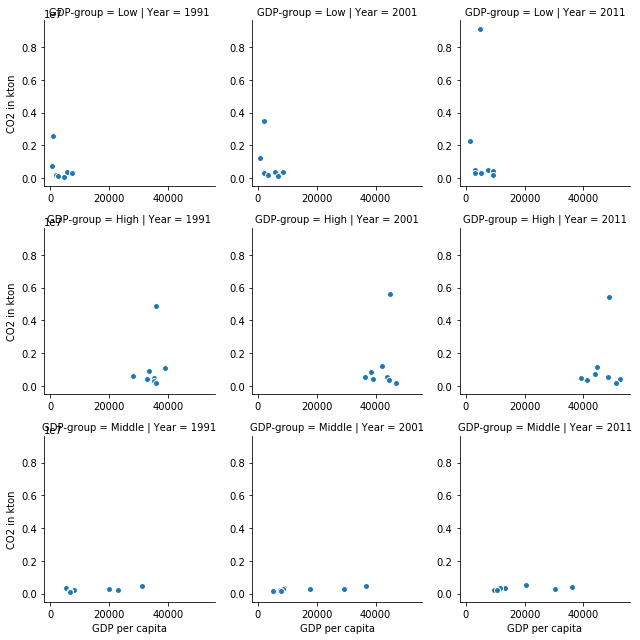

In [33]:
g = sns.FacetGrid(test2, col='Year',  row='GDP-group')
g = g.map(plt.scatter, 'GDP per capita', 'CO2 in kton', edgecolor="w")

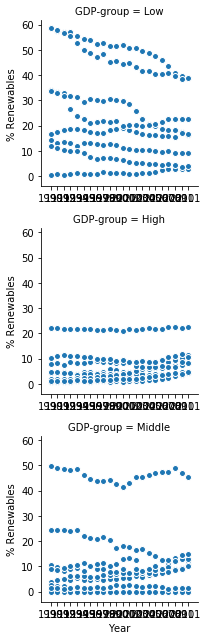

In [34]:
h = sns.FacetGrid(test,  row='GDP-group')
h = h.map(plt.scatter, 'Year', '% Renewables', edgecolor="w")

# Kees

## Top-10 climbers and reducers

### Climbers
- Top-30 polluters contribute the vast share to the global CO2 emissions
- After some research, found that the top-30 polluters all had data of the year 2011

To visualize:
- Determined the emission increase over 2001 - 2011
    - both absolute (gigaton) and as a percentage
- Plotted the 2011 emission
    - contributions of 2001 emission and increase are displayed separately
    - sorted by percentual increase

---

<img src="./png/Biggest emitters.png">

---

In [36]:
#read the data from disk
df_top30_2011 = pd.read_csv("../csv/CO2_df.csv")

#add a column with the percentual change
df_top30_2011['perc. change'] = 100*(df_top30_2011['2011'] - df_top30_2011['2001'])/df_top30_2011['2001']

#add a column with the net increase between 2001 and 2011
df_top30_2011['increase'] = df_top30_2011['2011'] - df_top30_2011['2001']

#Create a new dataframe to pick the top-10 sorted by percentual increase 
df_top10_inc = df_top30_2011.sort_values('perc. change', ascending = False).head(10)

#Reverse the sort order, so as to obtain the desired chart, with the biggest polluter on top.
df_top10_inc = df_top10_inc.sort_values('perc. change')

#Obtain the appropriate data as lists from the dataframe
#First the list of countries
lstCountries = df_top10_inc['Country'].values.tolist()
#The other lists  
lstEmissions2001 = [w/1000000 for w in df_top10_inc['2001'].values.tolist()]
lstIncrease = [w/1000000 for w in df_top10_inc['increase'].values.tolist()]
lstPercChange= df_top10_inc['perc. change'].values.tolist()

#Create an array of the appropriate length
ind = np.arange(df_top10_inc.shape[0])

fig, ax1 = plt.subplots(1, 1, figsize=(14,8))
p1 = plt.barh(ind, lstEmissions2001)
p2 = plt.barh(ind, lstIncrease, left=lstEmissions2001, color='#d62728')

rects = p2.patches

ax1.set_xlim(0,10.2)
ax1.set_xticks([2, 4, 6, 8, 10])
ax1.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Top-10 climbers by percentual increase in 2001-2011 period')
plt.xlabel('CO2 emissions in gigaton')

plt.yticks(ind, lstCountries)

#Bar labels
i=0
for rect in rects: 
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_x() + rect.get_width()
    label = '+' + str(int(lstPercChange[i])) + '%'
    ax1.annotate(label, (x_value, y_value), ha='left', xytext=(x_value+0.05, y_value-0.1))
    i=i+1

plt.legend((p1[0], p2[0]), ('2001 emission', 'increase 2001-2011'))
plt.show()

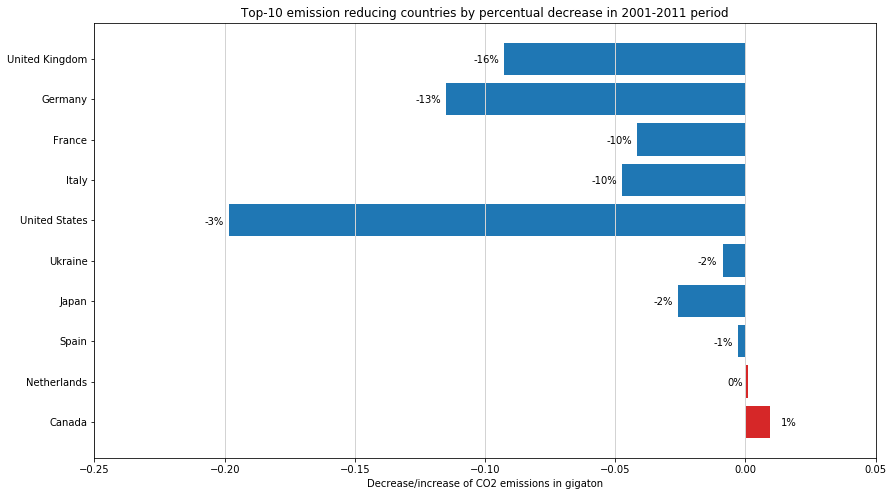

In [39]:
#Create a scratch dataframe to pick the top-10 decreasers, sorted by percentual decrease 
df_top10_dec = df_top30_2011.sort_values('perc. change').head(10)

#Reverse the sort order, so as to obtain the desired chart, with the biggest polluter on top.
df_top10_dec = df_top10_dec.sort_values('perc. change', ascending=False)

#Obtain the appropriate data as lists from the dataframe
#First the list of countries
lstCountries = df_top10_dec['Country'].values.tolist()
#The other lists  
lstEmissions2001 = [w/1000000 for w in df_top10_dec['2001'].values.tolist()]
lstIncrease = [w/1000000 for w in df_top10_dec['increase'].values.tolist()]
lstPercChange = df_top10_dec['perc. change'].values.tolist()

#Create an array of the appropriate length
ind = np.arange(df_top10_dec.shape[0])

fig, ax1 = plt.subplots(1, 1, figsize=(14,8))
p1 = plt.barh(ind, lstIncrease)

rects = p1.patches

#Bar labels
i=0
for rect in rects: 
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_width() #rect.get_x() #- 
    label = str(int(lstPercChange[i])) + '%'
    #The bottom bar requires special positioning. In MatPlotLb, this is patch[0]
    if i>0:
        ax1.annotate(label, (x_value, y_value), ha='right', xytext=(x_value-0.002, y_value-0.1))
    else: 
        ax1.annotate(label, (x_value, y_value), ha='right', xytext=(x_value+0.01, y_value-0.1))
    #Likewise, the two bottom bars can be given a different color    
    if i<=1:
            rect.set_facecolor('#d62728')
    i=i+1

ax1.set_xlim(-0.25,0.05)
#ax1.set_xticks([2, 4, 6, 8, 10])
ax1.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Top-10 emission reducing countries by percentual decrease in 2001-2011 period')
plt.xlabel('Decrease/increase of CO2 emissions in gigaton')

plt.yticks(ind, lstCountries)

plt.show()

### Reducers
- Even some top-10 "reducers" have effectively increased their emissions in 2001-2011
- Same visualization technique cannot be used
    - Negative surfaces cannot be plotted
- So, just plotted the percentual decrease (or increase)
- Note the different scale on X-axis



---

<img src="./png/Biggest decreasers.png">

---

### Correlations
Apart from the Ukraine, all top-10 reducers seem to be developed countries, so
- Is the reduction in CO2 emission compensated for by an increase in renewable energy?
- Is there a connection with the GDP?

To find out
- Put GDP in five different classes
- Plotted _percentual change_ in emission vs. _change_ of the share of renewable energy in total consumption (in percent)
- Used GDP-class as color

In [41]:
import math
import numpy as np


#A quick function to categorize GDP
def fn_gdp_cls(gdp):
    return math.floor(float(gdp)/12500)

#Picks the values for the dataframe rows with only this GDP-class
def get_data_for_this_gdp_class(gdp_cl):
    #Create a query string
    qu = 'gdp_class == ' + str(gdp_cl)
    res = df_Corr.query(qu)[['perc_ch_emsn', 'delta_renew']].values.tolist()
    #transpose the result
    return np.array(res).T.tolist()

#read the data from disk
df_CO2_corr = pd.read_csv("../csv/CO2_df.csv")
df_REN_corr = pd.read_csv("../csv/REN_df.csv")
df_GDP_corr = pd.read_csv("../csv/GDP_df.csv")

#Remove countries for which no data about renewable energy exist for 2011
df_REN_corr.dropna(subset=['2011'], inplace=True)
#Same for GDP
df_GDP_corr.dropna(subset=['2011'], inplace=True)

#To the CO2 dataframe, add a column with the percentual change from years 2001 to 2011
df_CO2_corr['perc_ch_emsn'] = 100*(df_CO2_corr['2011'] - df_CO2_corr['2001'])/df_CO2_corr['2001']

#To the renewable energy dataframe, add a column with the change in the percentual
#share of renewable energy, also for 2001 and 2011
df_REN_corr['delta_renew'] = df_REN_corr['2011'] - df_REN_corr['2001']

#To the GDP dataframe, add a column that groups the GDP over 2011 by effectively performing an integer divide operation
#First, rename the year column, to avoid pesky problems with data types
df_GDP_corr = df_GDP_corr.rename(columns={'2011': 'Y2011'})
df_GDP_corr['gdp_class'] = df_GDP_corr.apply(lambda row: fn_gdp_cls(row.Y2011), axis=1)

#Remove all columns, except the countries and the columns we've just added
df_CO2_corr = df_CO2_corr[['Country', 'perc_ch_emsn']]
df_REN_corr = df_REN_corr[['Country', 'delta_renew']]
df_GDP_corr = df_GDP_corr[['Country', 'gdp_class']]

#In SQL parlance, join the three dataframes on country and sort by increase in CO2 emission
df_Corr = pd.merge(df_CO2_corr, df_REN_corr, on='Country')
df_Corr = pd.merge(df_Corr, df_GDP_corr, on='Country').sort_values('perc_ch_emsn', ascending = False)

#Obtain the GDP-classes as an ordered set with only unique values
lstGDPClass = df_Corr['gdp_class'].values.tolist()
setGDPClass =set(lstGDPClass)

#For each GDP-class, pick the data for that class. The actual plot consists of subplot for each class,
#in order to produce a nice-looking legend
data_per_class = [get_data_for_this_gdp_class(x) for x in setGDPClass]

#Choose a set of appropriate colors for each GDP-class
colors = ['blue', 'aqua', 'limegreen', 'orange', 'red']

#Set the appropriate labels
labels = ['0-12500', '12500-25000', '25000-37500', '37500-50000', '> 50000']

#Define the plot
fig, ax = plt.subplots(1,1, figsize=(14,8))

#Make a scatter plot for each GDP-class, in order to produce a nice looking legend
pl = []
for i in setGDPClass:
    pl.append(plt.scatter(data_per_class[i][0], data_per_class[i][1], color=colors[i]))

#Add plot aesthetics
plt.legend(pl, labels, scatterpoints=1, title='GDP per capita \n (USD per year)\n', loc='upper right')    
ax.set_title('Connection between the decrease/increase in CO2 emission and the rate of change\n of the share of renewable energy in the total energy consumption')

ax.set_xticks([0, 50, 100, 150])
ax.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)

ax.set_yticks([5, 0, -5, -10])
ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=1)
ax.xaxis.grid(color='lightgray', linestyle='-', linewidth=1)

plt.xlabel('Percentual change in CO2 emission 2001-2011')
plt.ylabel('Difference in percentage of renewable\n  energy share 2001-2011')

#Make all plots visible
for i in setGDPClass:
    plt.show()

---
<img src="./png/Correlation.png">
---
- Correlation seems to be there
    - Countries that decreased their CO2-emission, increased their share of renewable energy

---
<img src="./png/Correlation.png">
---
- Most blue dots end up in the bottom-right region
- Orange dots are all in top-left region
    - Countries that increased their CO2-emission and decreased their renewable energy share, tend to have low gdp and vice versa